In [6]:
import numpy as np
import math
import matplotlib.pyplot as plt

# Example1:
$ y \prime{x}  = 3y + 2$  
y(0) = 0

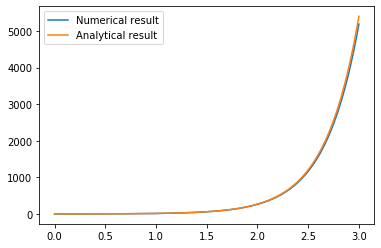

In [20]:
dydx = lambda y: 3*y + 2
y = lambda x:2*np.exp(3*x) / 3 -2/3
y0 = 0
lb = 0
ub = 3
N = 1000
x_array = np.linspace(lb,ub,N+1)
y_array = np.array([None] * (N + 1 ))
y_array[0] = 0 ## boundary condition
delta = (ub - lb) / N
for i in range(1,N + 1):
    y_array[i] = y_array[i-1] + dydx(y_array[i-1]) * delta

plt.plot(x_array,y_array,label = "Numerical result")
plt.plot(x_array,y(x_array),label = "Analytical result")
plt.legend()


# Example2
$ y \prime  = 1 - x + 4y$  
$ y(0) = 0 $ 

$ y = \frac{x} {4}  - \frac{3}{16} + \frac{19}{16} \exp{4x}$ 

C:\Users\Ruich\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


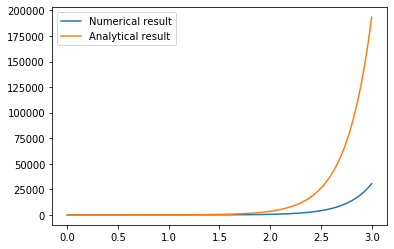

In [25]:
# forward Euler
dydx = lambda x,y: 1 - x + 4 * y
y = lambda x:x/4 + 19/16 *np.exp(4*x) - 3/16
y0 = 1
lb = 0
ub = 3
N = 100000
x_array = np.linspace(lb,ub,N+1)
y_array = np.array([None] * (N + 1 ))
y_array[0] = 0 ## boundary condition
delta = (ub - lb) / N
for i in range(1,N + 1):
    y_array[i] = y_array[i-1] + dydx(x_array[i-1],y_array[i-1]) * delta

plt.plot(x_array,y_array,label = "Numerical result")
plt.plot(x_array,y(x_array),label = "Analytical result")
plt.legend()

# Comparison between forward Euler and Crank-Nicolson scheme

u() is the target function, h is the step, f is the first order differential equation

- Forward Euler
  - $ u_{n+1} = u_{n} + h f(u_{n},t_{n})$

- Crank-Nicolson
  - $ u_{n+1} = u_{n} + \frac{1}{2} h (f(u_{n},t_{n}) + f(u_{n + 1},t_{n + 1}))$, where $u_{n + 1} = u_{n} + h f(u_{n},t_{n})$

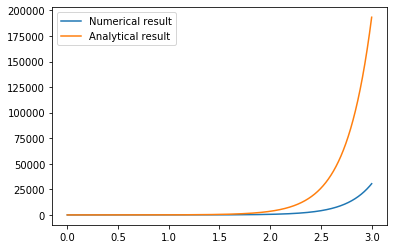

In [75]:
# mid point (1D Crank-Nicolson scheme)
dydx = lambda x,y: 1 - x + 4 * y
y = lambda x:x/4 + 19/16 *np.exp(4*x) - 3/16
y0 = 1
lb = 0
ub = 3
N = 100000
x_array = np.linspace(lb,ub,N+1)
y_array = np.array([None] * (N + 1 ))
y_array[0] = 0 ## boundary condition
delta = (ub - lb) / N
for i in range(1,N + 1):
    y_array[i] = y_array[i-1] + 0.5 * ( dydx(x_array[i-1],y_array[i-1]) + dydx(x_array[i],y_array[i-1] + delta * dydx(x_array[i-1],y_array[i-1]))) * delta

plt.plot(x_array,y_array,label = "Numerical result")
plt.plot(x_array,y(x_array),label = "Analytical result")
plt.legend(loc = "best")

# Use Euler forward and Crank-Nicolson to solve ODE
- Implementation of multi-dimensional solution matrix
  1. create a n * p matrix, where n is the number of steps and p is the number of variables. e.g: $y = x^2$, the number of variable is 2, inlucde x itself  
   
  2. Regarding the independent variable, it could be variables other than x, ODE circle will be an example. If the independent variable is x itself, the first order derivatives is just 1  
   
- Implementation FE and CR
  1. In FE: $U[i] = U[i-1]  + \delta f(U[i-1])$  
   
  2. In CR: $U[i] = U[i-1]  + \frac{1}{2}\delta(f(U[i-1])+f(U[i]))$, where $f(U[i]) = f(x_{i},y_{i},\dots)$ and $f(x_{i},y_{i},\dots) = f(x_{i-1} + \delta x_{Increament},y_{i-1} + \delta y_{Increament},\dots)$  
   
  3. follow 2), In code implementation, we could assign $ (x_{i},y_{i},\dots) = (x_{i-1},y_{i-1,\dots}) + \delta f(x_{i-1},y_{i-1,\dots}) $

In [63]:
def ode_solver(f,boundaryConditon,ub,lb,N,method = 'FE'):
    '''
    f is the multi-dimisional Jacobian, say dy/dx = g(x,y), if the independent variable is x,
    then f = (1,g(x,y))
    boundaryConditon is the starting point of the numerical solution
    ub/lb is the upper/lower bound of the underlying
    N is number of steps
    method only supprt 'FE' standing for forward Euler, 'CR' standing for Crank-Nicolson
    '''
    p = len(boundaryConditon) # p is number of variables
    U = np.zeros((N + 1,p))         # U is the solution matrix
    independentVariable = np.linspace(lb,ub,N + 1)
    delta = (ub - lb) / N     # delta is the step
    U[0] = boundaryConditon   # initialize the solution 
    for i in range(1,N+1):
        if method == "FE":
            U[i] = U[i-1] + delta * f(U[i-1])
        elif method == "CR":
            variableIncrement = delta * f(U[i-1])
            U_temp = U[i-1] + variableIncrement
            U[i] = U[i-1] + 1/2 * delta * (f(U[i-1]) + f(U_temp))
        else:
            raise("{} method is not supported in ODE solver".format(method))
    return independentVariable,U

# Comparison between Forward Euler and Crank-Nicolson
## Example1: ODE result, we compute $y = x^1 + 1$, from the numerical result we could observer that $y(5) = 26$ in Crank-Nicolson scheme but $y(5) != 26$

f(5) = 25.99999999999967 in CR scheme
f(5) = 25.97499999999966 in FE scheme
f(5) = 26 in Analytical formula


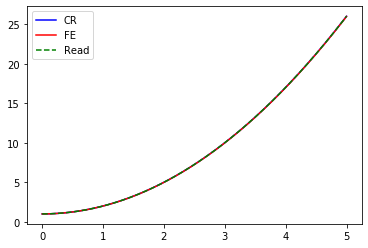

In [78]:
F = lambda x:x**2 + 1
f = lambda x:np.array([1,2*x[0]])
boundaryConditon = np.array([0,1])
lb,ub = 0,5
N = 1000
##
t1,u1 = ode_solver(f,boundaryConditon,ub,lb,N,method = 'CR')
X1 = u1[:,0]
Y1 = u1[:,1]

t2,u2 = ode_solver(f,boundaryConditon,ub,lb,N,method = 'FE')
X2 = u2[:,0]
Y2 = u2[:,1]

plt.plot(X1, Y1, 'b-',label = 'CR')
plt.plot(X2, Y2, 'r-',label = 'FE')
plt.plot(X1,F(X1),'g--',label = 'Read')
plt.legend()
print("f(5) = {} in CR scheme".format(Y1[-1]))
print("f(5) = {} in FE scheme".format(Y2[-1]))
print("f(5) = {} in Analytical formula".format(F(5)))

## Example2: Use ODE to draw a circle

Last point [-9.22872889e-15  5.00000000e+00]


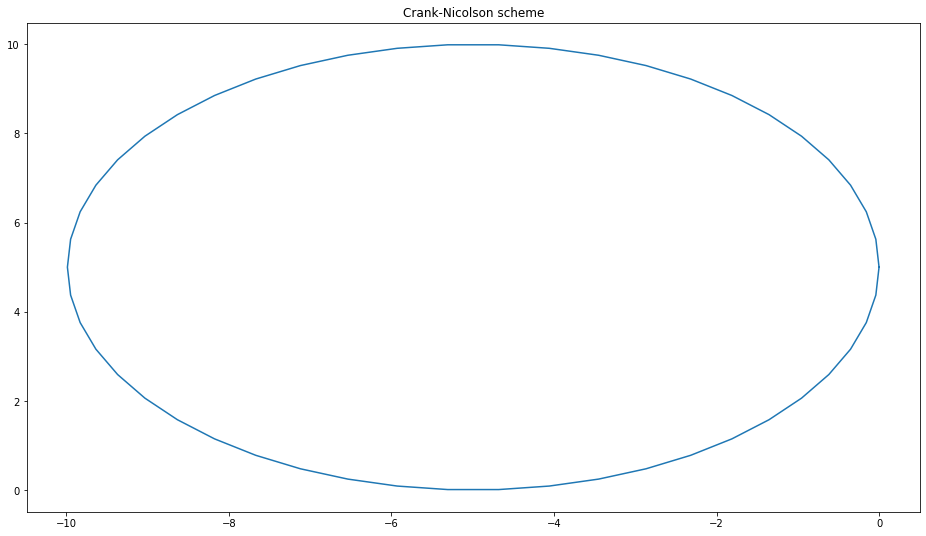

Last point [-1.15185639e-14  5.00000000e+00]


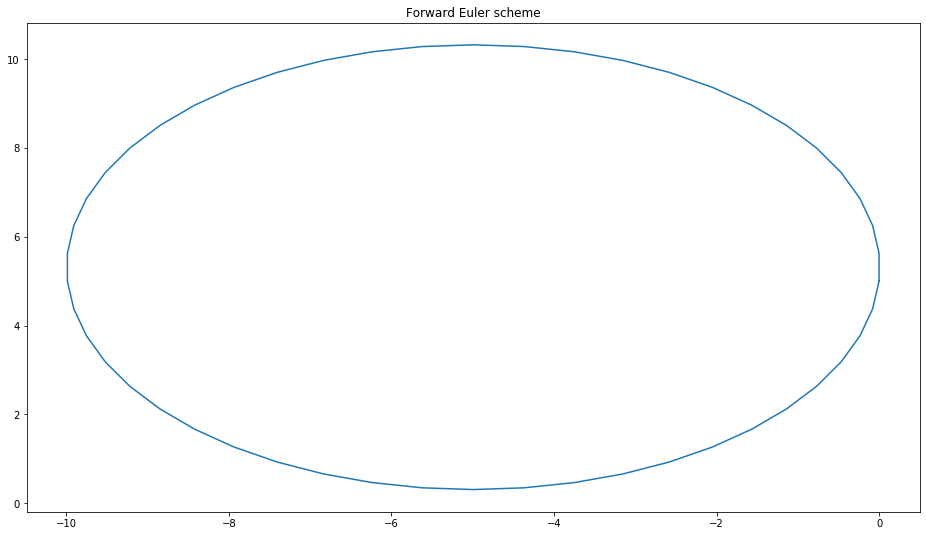

In [99]:
r = 5
f = lambda x:np.array([1,-r * math.sin(x[0]),r * math.cos(x[0])])
boundaryConditon = np.array([0,0,5])
lb,ub = 0,2*np.pi
N = 50
##
t1,u1 = ode_solver(f,boundaryConditon,ub,lb,N,method = 'CR')
X1 = u1[:,1]
Y1 = u1[:,2]
plt.figure(figsize=(16,9))
plt.plot(X1, Y1,label = 'CR')
plt.title("Crank-Nicolson scheme")
print("Last point {}".format(u1[-1][1:]))
plt.show()


t2,u2 = ode_solver(f,boundaryConditon,ub,lb,N,method = 'FE')
X2 = u2[:,1]
Y2 = u2[:,2]
plt.figure(figsize=(16,9))
plt.plot(X2, Y2,label = 'FE')
plt.title("Forward Euler scheme")
print("Last point {}".format(u2[-1][1:]))
plt.show()

